# BL40A2020 Wireless Communication Systems

## Assignment  week 2: Analog communication

## Author: Eero Suomalainen

### A) Follow the steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%202/week2.ipynb) to analyze the *Conventional AM* (Sec. 3.2.2)

**1. Define a generic message $m(t) = A_\mathrm{m} \cos(2\pi f_\mathrm{m} t + \phi)$ and modulation equation [from eq. (3.5) p.96](https://www.ece.ucsb.edu/wcsl/Publications/intro_comm_systems_madhow_jan2014b.pdf) using sympy.**

In [2]:
! pip install scikit-dsp-comm
! pip install --upgrade sympy

In [3]:
import sympy as sp
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [4]:
A,n,t,Am,Ac,fm,fc,f,w = sp.symbols('A, m, t, A_m, A_c, f_m, f_c,  f, phi')
n = sp.Function('m')

In [5]:
print('Message')
m = Am * sp.cos(2*sp.pi*fm*t+w) 
m

Message


In [6]:
print('Modulation')
u = A * n(t) * sp.cos(2*sp.pi*fc*t) + Ac * sp.cos(2*sp.pi*fc*t)
u

Modulation


**2. Numerical example:**

- Message: $m(t) =  \cos{\left (8 \pi t + \frac{\pi}{3} \right )}$
- Modulation parameters: $A = A_\mathrm{c} = 2$ and  $f_\mathrm{c} = 50$

(a) Plot the message, the transmitted signal, and their respective spectrum domain. Note that you should probably use other python libraries (scipy, numpy, and other for signal processing).

In [7]:
m_example = sp.cos(8*sp.pi*t+sp.pi/3)
m_example

In [8]:
amp_c = 2
freq_c = 50
modulated_signal = u.subs(fc,freq_c).subs(A,amp_c).subs(Ac,amp_c).subs(n(t),m_example)
modulated_signal

In [9]:
message =  sp.lambdify(t,sp.cos(8*sp.pi*t+sp.pi/3),"numpy")
modulation_only = sp.lambdify(t,u.subs(fc,freq_c).subs(A,amp_c).subs(Ac,amp_c).subs(n(t),1),"numpy")

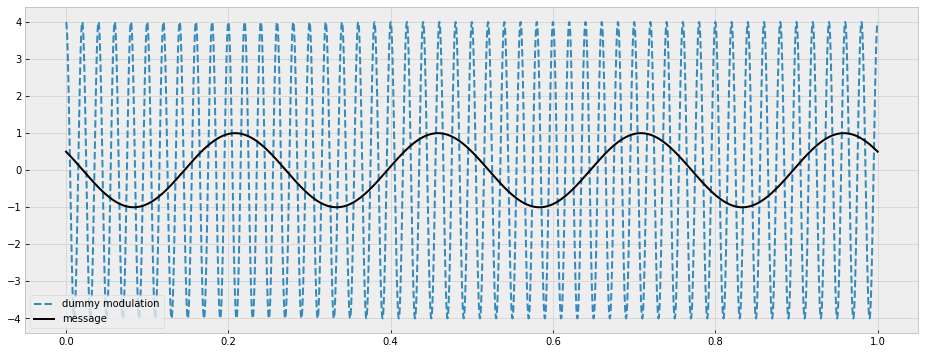

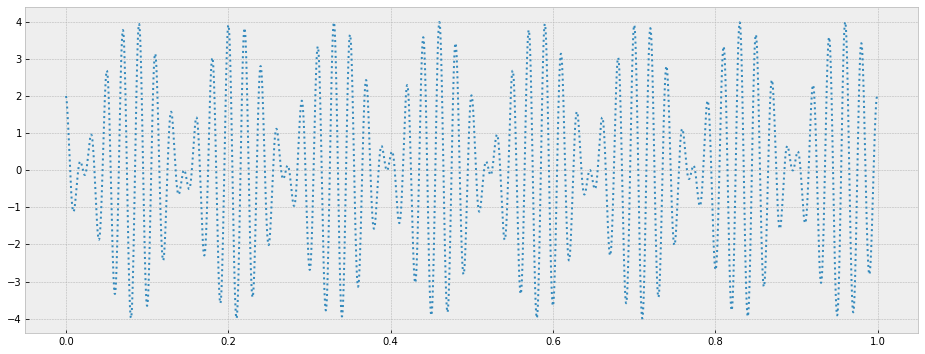

In [12]:
fp = 4000 
tp = np.linspace(0, 1, fp)
plt.rcParams['figure.figsize'] = 16, 6
plt.plot(tp, modulation_only(tp),linestyle='--',label='dummy modulation')
plt.plot(tp,  message(tp),'k-',label='message')
plt.legend(loc='lower left')
plt.show()
plt.plot(tp, modulation_only(tp)*message(tp),':')
plt.show()

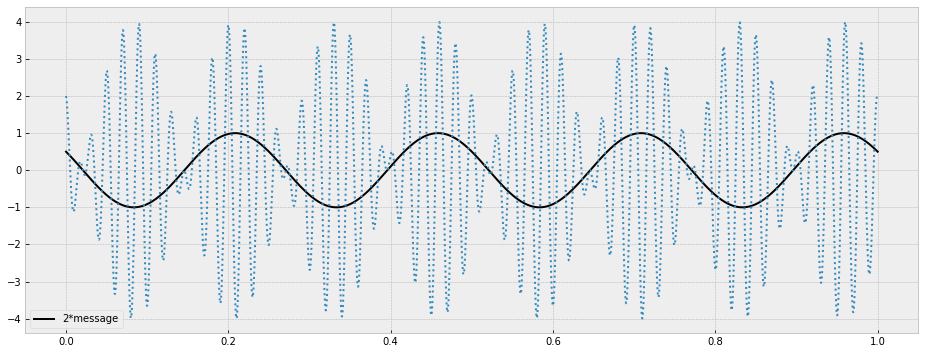

In [13]:
plt.plot(tp,  message(tp),'k-',label='2*message')
plt.plot(tp, modulation_only(tp)*message(tp),':');
plt.legend(loc='lower left')
plt.show()

(b) Implement the demodulation remembering that the message can be directly recovered by the envelope.

In [14]:
recovering = m * u
recovering

### B) Explain with your own words and in few lines the difference between *Angle Modulations* and *Amplidute Modulations*. 

In angle modulations the frequency or the phase of the carrier wave is varied 
where as in amplitude modulations the amplitude of the carrier is varying.